In [2]:
import pandas as pd
import os
import numpy as np

In [5]:
pwd = os.getcwd()
data_set = pd.read_csv(pwd + "\\train.csv")

data_set = data_set.copy()

data_set.head()
type(data_set)


pandas.core.frame.DataFrame

### Counting number of times words repeat


In [33]:
from collections import Counter
import string

def most_common_words(data, num_words, ignored_words = None):
    
    all_text = ' '.join(data)

    # Remove common punctuation marks
    translator = str.maketrans("", "", string.punctuation)
    all_text = all_text.translate(translator)

    if ignored_words is None:
        ignored_words = []

    
    single_words = all_text.split()

    count_words = Counter(single_words)
    if single_words in ignored_words:
        single_words.remove(ignored_words)


    most_common = count_words.most_common(num_words)

    filtered_words = [word for word in most_common if word[0] not in ignored_words]

    return filtered_words



### Using the function to filter words ignoring common words

In [38]:

num_words = 100
data = data_set["tweet"]
ignored_words = ["off","yall","good","youre","hate","aint","Im","amp","If","yo","The","This","then","bad","make","think","My","need","u","these","i","amp","You","lol","love","if","them","when","know","want","dont","cant", "its","hes","shes","them","who","say","see","look","ya","a","RT","the","I","to","you","and","that","my","in","is","like","of","on","be","me","for","with","it","so","your","at","have","this","not","just","but","are","was","they","he","when","what","get","we","about","all","go","up","out","do","if","day","from","will","am","how","no","one","know","today","get","now","can","as","want","got","back","going","still","too","really","time","would","or","some","more","has","an","by","her","him","his","did","were","has","their","there","than","here","she","did"]
res = most_common_words(data, num_words, ignored_words)
res

[('bitch', 7993),
 ('bitches', 2937),
 ('hoes', 2278),
 ('pussy', 2052),
 ('hoe', 1846),
 ('ass', 1534),
 ('shit', 1188),
 ('fuck', 1142),
 ('trash', 1116),
 ('nigga', 1098),
 ('niggas', 649),
 ('fucking', 569)]

## Plotting out the most common words


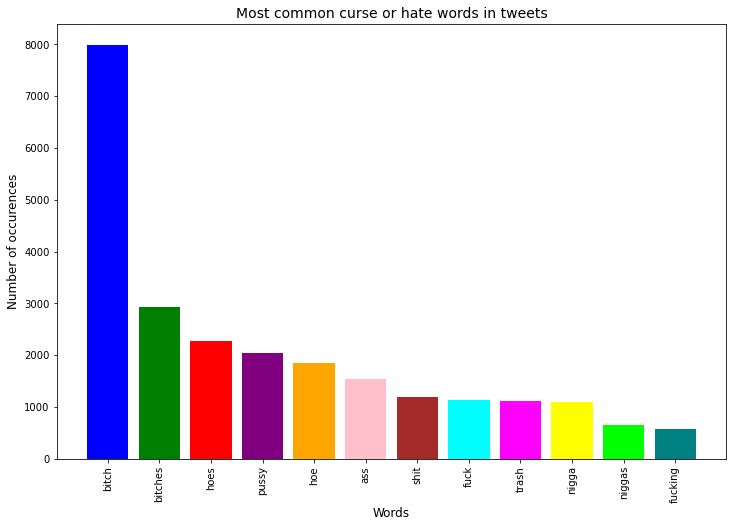

In [55]:
import matplotlib.pyplot as plt

word, count = zip(*res)

bar_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'gray']

plt.figure(figsize=(12, 8))
plt.bar(word, count, color=bar_colors)
plt.xticks(rotation=90)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Number of occurences", fontsize=12)
plt.title("Most common curse or hate words in tweets", fontsize=14)
plt.show()